# Salary based on skills and experience

Project part of the University of Tartu's course **"Introduction to Data Science (Sissejuhatus andmeteadusesse) - LTAT.02.002"**

Author: Anders Nõu

<br>

## Step 0 - Preparation

Since the goal is to find out what skills are specifically affecting developer skills, then will filter out the answers that are not by professional developers. There were 88 883 entries before, after filtering out the unfit results, we have 65 679 results left. With filtration, we removed 23 204 entries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('survey_results_public.csv')

# Choosing only full time developers
data = data[data["MainBranch"] == 'I am a developer by profession']

# Displaying an example of data
data.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy
6,7,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,"Independent contractor, freelancer, or self-em...",Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Another engineering discipline (ex. civil, ele...",...,A lot more welcome now than last year,NaN,42.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Neither easy nor difficult
8,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
9,10,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,India,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Somewhat less welcome now than last year,Tech articles written by other developers;Tech...,NaN,NaN,NaN,NaN,NaN,Yes,Too long,Difficult




<br>

## Step 1 - Calculating new salaries based on respondents country's average salary

### Problem of salary difference in countries

Since each country has a different kind of average salary, then to predict the salary, we also have to take into account the developers country in which they work in. To resolve this problem, I will use a dataset of average salaries to calculate the correspondent's salary according to his/her country with the following formula:

\begin{equation*}
\frac{developerSalary}{averageSalary}
\end{equation*}

With the above formula, I will get the coefficient of how many times is the developer's salary higher/smaller than his/her country's average salary. The Coefficient column in the "salaries" dataframe will display the beforementioned value.  

### Average salary data

I am using the following average salary data of 94 countries: https://www.numbeo.com/cost-of-living/country_price_rankings?displayCurrency=USD&itemId=105.


I chose this data set because it includes a lot of countries compared to some other data sets. The more countries the data set includes, the less entries I lose in the Stack Overflow's Developer Survey data. I chose to choose only one data set and avoid mixing and merging different data sets into one because they might and probably have different methodologies, different resource and so on. Due to this, I lost about 3000 entries from the Stack Overflow's survey due to lack of data about the respondents country's average salary in the average salary data.

### Salaries dataframe

**The "salaries" dataframe consists of the following columns:**  <br>  <br>
1) Respondent - Respondent's id from the original data <br>
2) Country - Developer's country to calculate the average salary <br>
3) WorkWeekHrs - Respondent's work week in hours <br>
4) ConvertedComp - Salary converted to annual USD salaries using the exchange rate on 2019-02-01, assuming 12 working months and 50 working weeks. <br>
5) SalaryHourly - Developer's hourly salary (just for personal interest). Calculated by dividing the ConvertedComp by 12 to get the monthly salary and then dividing the result with the WorkWeekHrs. <br>
6) SalaryPer40HourWorkWeek - Developer's salary if their work week was 40 hours (to counter the issue that some work more than 40 hours and some work less). Calculated by multiplying SalaryHourly by 40 (number of hours in standard work week) and 12 (number of months).  <br>
7) Coefficient - Calculated by dividing the SalaryPer40HourWorkWeek by corresponding country's average salary.  <br>
8) CoefficientSalary - Shows the salary on a global scale. Calculated by multiplying Coefficient with the SalaryPer40HourWorkWeek. <br>

In [2]:
# Formats the floats to 2 decimal points
pd.options.display.float_format = '{:.2f}'.format

# Creating a new table to calculate new columns based on salary
salaries = pd.DataFrame({'Respondent': data["Respondent"], 'Country': data["Country"],
                         'WorkWeekHrs': data["WorkWeekHrs"], 'ConvertedComp': data["ConvertedComp"]})

# Data for average salaries
# https://www.numbeo.com/cost-of-living/country_price_rankings?displayCurrency=USD&itemId=105
avg_salaries = pd.read_csv('average_salary.csv')

# Saving countries to an array
country_list = avg_salaries["Country"].values

# Removing countries that we don't have salary data about (lost about 3000 rows)
salaries = salaries[salaries["Country"].isin(country_list)]


# Calculating the coefficent ConvertedComp / AverageSalary to get a correlated salary

# Dropping entries where the person chose not to answer about his/her salary
salaries = salaries.dropna()

# Calculating hourly salary
salaries["SalaryHourly"] = salaries["ConvertedComp"]/12 / salaries["WorkWeekHrs"]

# Converting all the salaries to 40 hour work week salary
salaries["SalaryPer40HourWorkWeek"] = salaries["SalaryHourly"]*40*12 # Salary (in a year)

coefficient = pd.DataFrame({'Coefficient': []})

for i in range(salaries.shape[0]):
    country = salaries["Country"].iloc[i]
    avg_salary = avg_salaries[avg_salaries["Country"] == country].Salary.iloc[0]
    
    avg_salary = avg_salary.replace(",", "") # Removing comma
    avg_salary = float(avg_salary[:-2]) # Removing dollar symbol and unnecessary whitespace at the end, converting to float
    coefficient.loc[i] = salaries["SalaryPer40HourWorkWeek"].iloc[i] / (avg_salary*12) # multiplied with 12 because data is per month

# Now we have a coefficient according to each countries average salary 
# (How much bigger is the salary according to the avergae salary)

# Resetting index to add coefficient column to salaries dataframe
salaries = salaries.reset_index()
# Removing the "index" column created from the reset_index function
salaries = salaries.drop(columns=["index"])

salaries["Coefficient"] = coefficient

# Calculating the salary with the average salary coefficient and a standard 40 hour work week
salaries["CoefficientSalary"] = salaries["Coefficient"]*salaries["SalaryPer40HourWorkWeek"]

# Displaying an example
salaries.head()

,Respondent,Country,WorkWeekHrs,ConvertedComp,SalaryHourly,SalaryPer40HourWorkWeek,Coefficient,CoefficientSalary
0,4,United States,80.00,61000.00,63.54,30500.00,0.79,24180.45
1,9,New Zealand,32.00,95179.00,247.86,118973.75,4.04,480268.22
2,10,India,70.00,13293.00,15.82,7596.00,1.45,10986.06
3,13,United States,40.00,90000.00,187.50,90000.00,2.34,210547.33
4,14,Germany,40.00,57060.00,118.88,57060.00,1.92,109495.18


### Results without salary

Some of the respondents decided not to disclose their salary and therefore I am removing the rows without salary information. There were 17731 rows without salary information.

In [3]:
respondents = salaries["Respondent"].values

# Removing results that don't have salary information
print("Rows without salary information: " + str(data[~data["Respondent"].isin(respondents)].shape[0]))

data = data[data["Respondent"].isin(respondents)]

Rows without salary information: 17731


<br>

### Converting features to binomial values

Since all the values in the skill features (LanguageWorkedWith, DatabaseWorkedWith, PlatformWorkedWith, WebFrameWorkedWith & MiscTechWorkedWith) and education level (EdLevel) are non-numerical features, I have to find all the unique options in the questions.
After finding all the unique options, I am creating a binomial distribution from the unique options. The 0's will represent that the corresponding developer does not have the skill/education, and the 1's will represent that the developer has acquired the skill/education.

#### Unique options in non-numerical columns

1) LanguageWorkedWith - 27 <br>
2) DatabaseWorkedWith - 13 <br>
3) PlatformWorkedWith - 16 <br>
4) WebFrameWorkedWith - 12 <br>
5) MiscTechWorkedWith - 18 <br>
6) EdLevel - 9<br>
<br>
**Total: 95 + YearsCodePro = 96 features in the features dataframe** <br>

<details>
    <summary>Show languages</summary>
    C, C+, C#, Python, SQL, Bash/Shell/PowerShell, HTML/CSS, JavaScript, Ruby, Rust, TypeScript, WebAssembly, Go, R, PHP, VBA, Java, Swift, Kotlin, Objective-C, Elixir, Erlang, Assembly, Scala, Dart, Clojure, F#
</details>

<details>
    <summary>Show databases</summary>
    MySQL, SQLite, DynamoDB, PostgreSQL, Elasticsearch, MongoDB, Microsoft SQL Server, Couchbase, Firebase, Oracle, Redis, MariaDB, Cassandra
</details>

<details>
    <summary>Show platforms</summary>
    Linux, Windows, AWS, Docker, Heroku, MacOS, Slack, Android, IBM Cloud or Watson, iOS, Microsoft Azure, WordPress, Arduino, Raspberry Pi, Google Cloud Platform, Kubernetes
</details>

<details>
    <summary>Show web frames</summary>
    Express, Ruby on Rails, Angular/Angular.js, ASP.NET, Django, Flask, jQuery, Vue.js, Spring, React.js, Laravel, Drupal
</details>

<details>
    <summary>Show misc tech</summary>
    .NET, Node.js, Unity 3D, Pandas, Torch/PyTorch, Xamarin, .NET Core, Ansible, Chef, Cordova, Puppet, React Native, TensorFlow, Hadoop, Apache Spark, Flutter, Unreal Engine, CryEngine]
</details>

<details>
    <summary>Show education levels</summary>
Bachelor’s degree (BA, BS, B.Eng., etc.), Some college/university study without earning a degree, Master’s degree (MA, MS, M.Eng., MBA, etc.), Other doctoral degree (Ph.D, Ed.D., etc.), Primary/elementary school, Associate degree, Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.), Professional degree (JD, MD, etc.), I never completed any formal education
</details>

In [4]:
# Function for finding unique options from the survey
def findUniqueEntries(column):
    unique = []
    for i in range(len(column)):
        row = column.iloc[i]
        if type(row) != float:
            row_split = row.split(";")
            for j in range(len(row_split)):
                if row_split[j] not in unique:
                    if row_split[j] != "Other(s):":
                        unique.append(row_split[j])
    return unique

languages = findUniqueEntries(data["LanguageWorkedWith"])
databases = findUniqueEntries(data["DatabaseWorkedWith"])
platforms = findUniqueEntries(data["PlatformWorkedWith"])
webframes = findUniqueEntries(data["WebFrameWorkedWith"])
miscs = findUniqueEntries(data["MiscTechWorkedWith"])
edlevels = findUniqueEntries(data["EdLevel"])

# Adding all the unique features to a list
all_features_list = []
all_features_list.extend(languages)
all_features_list.extend(databases)
all_features_list.extend(platforms)
all_features_list.extend(webframes)
all_features_list.extend(miscs)
all_features_list.extend(edlevels)

# Printing out unique options
print(languages)
print(databases)
print(platforms)
print(webframes)
print(miscs)
print(edlevels)

# Printing out number of options for each feature
print("Number of unique options in LanguageWorkedWith: " + str(len(languages)))
print("Number of unique options in DatabaseWorkedWith: " + str(len(databases)))
print("Number of unique options in PlatformWorkedWith: " + str(len(platforms)))
print("Number of unique options in WebFrameWorkedWith: " + str(len(webframes)))
print("Number of unique options in MiscTechWorkedWith: " + str(len(miscs)))
print("Number of unqiue options in EdLevels: " + str(len(edlevels)))

# Printing out number of 
print("Number of unique features in total: " + str(len(all_features_list)))

['C', 'C++', 'C#', 'Python', 'SQL', 'Bash/Shell/PowerShell', 'HTML/CSS', 'JavaScript', 'Ruby', 'Rust', 'TypeScript', 'WebAssembly', 'Go', 'R', 'PHP', 'VBA', 'Java', 'Swift', 'Kotlin', 'Objective-C', 'Elixir', 'Erlang', 'Assembly', 'Scala', 'Dart', 'Clojure', 'F#']
['MySQL', 'SQLite', 'DynamoDB', 'PostgreSQL', 'Elasticsearch', 'MongoDB', 'Microsoft SQL Server', 'Couchbase', 'Firebase', 'Oracle', 'Redis', 'MariaDB', 'Cassandra']
['Linux', 'Windows', 'AWS', 'Docker', 'Heroku', 'MacOS', 'Slack', 'Android', 'IBM Cloud or Watson', 'iOS', 'Microsoft Azure', 'WordPress', 'Arduino', 'Raspberry Pi', 'Google Cloud Platform', 'Kubernetes']
['Express', 'Ruby on Rails', 'Angular/Angular.js', 'ASP.NET', 'Django', 'Flask', 'jQuery', 'Vue.js', 'Spring', 'React.js', 'Laravel', 'Drupal']
['.NET', 'Node.js', 'Unity 3D', 'Pandas', 'Torch/PyTorch', 'Xamarin', '.NET Core', 'Ansible', 'Chef', 'Cordova', 'Puppet', 'React Native', 'TensorFlow', 'Hadoop', 'Apache Spark', 'Flutter', 'Unreal Engine', 'CryEngine']


In [5]:
features = pd.DataFrame(columns=all_features_list)

# Adding binomial values for each feature to the features dataframe
for i in range(data.shape[0]):
    row = data.iloc[i]
    features_list = []
    if type(row["LanguageWorkedWith"]) != float:
        features_list.extend(row["LanguageWorkedWith"].split(";"))
    if type(row["DatabaseWorkedWith"]) != float:    
        features_list.extend(row["DatabaseWorkedWith"].split(";"))
    if type(row["PlatformWorkedWith"]) != float:
        features_list.extend(row["PlatformWorkedWith"].split(";"))
    if type(row["WebFrameWorkedWith"]) != float:
        features_list.extend(row["WebFrameWorkedWith"].split(";"))
    if type(row["MiscTechWorkedWith"]) != float:
        features_list.extend(row["MiscTechWorkedWith"].split(";"))
    if type(row["EdLevel"]) != float:
        features_list.extend(row["EdLevel"])
    
    new_row = []
    
    # Adding binomial values to a row
    # 0 if developer doesn't have the skill, 1 if developer has the skill
    for j in range(len(all_features_list)):
        if all_features_list[j] not in features_list:
            new_row.append(0)
        else:
            new_row.append(1)
    
    features.loc[i] = (new_row)


# Adding Respondent column to keep track of respondents across dataframes, 
# because might need to remove some results due to cleaning data
respondents = salaries["Respondent"]
features["Respondent"] = respondents.reset_index().drop(columns=["index"])

experience = data.YearsCodePro.reset_index()
features["YearsCodePro"] = experience["YearsCodePro"]
    
# Displaying an example of "features" dataframe
features

,C,C++,C#,Python,SQL,Bash/Shell/PowerShell,HTML/CSS,JavaScript,Ruby,Rust,...,Some college/university study without earning a degree,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Other doctoral degree (Ph.D, Ed.D., etc.)",Primary/elementary school,Associate degree,"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)","Professional degree (JD, MD, etc.)",I never completed any formal education,Respondent,YearsCodePro
0,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,Less than 1 year
1,0,0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,9,4
2,0,0,1,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,10,10
3,0,0,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,13,8
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,14,2
5,0,0,1,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,16,3
6,0,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,17,2
7,0,0,1,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,19,13
8,0,1,0,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,22,18
9,0,0,0,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,23,1


### Converting YearsCodePro to binomial values

YearsCodePro column has mostly numerical values except for 2 values: "Less than 1 year" and "More than 50 years". I decided to convert "Less than 1 year" to value 0. With the value "More than 50 years", the choice is not that straightforward because the actual value could be in a wide range. One of the options would be to change the "More than 50 years" to a certain value above 50. Another option would be to analyze the respondent's age where YearsCodePro is "More than 50 years" and find the approximate experience by taking into account that a person starts his/her professional career at about age 21-23.

In [6]:
print("Number of 'Less than 1 year' features: " + str(features[features["YearsCodePro"] == "Less than 1 year"].shape[0]))
# Changing values "Less than 1 year" to 0
features = features.replace("Less than 1 year", 0)

print("Number of 'More than 50 years' features: " + str(features[features["YearsCodePro"] == "More than 50 years"].shape[0]))

print(features.shape)
print(salaries.shape)

Number of 'Less than 1 year' features: 2045
Number of 'More than 50 years' features: 10
(47948, 97)
(47948, 8)


#### Analyzing the results where YearsCodePro is "More than 50 years"

There are 10 results that have answered "More than 50 years" to the years coded professionally question. That number is small enough to go through one by one and analyze those results and then decide what to do with them. There might be some that are not valid entries and on others, I can decide which value I will replace the "More than 50 years" with.

In [16]:
data[data["YearsCodePro"] == "More than 50 years"]

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
20599,20714,I am a developer by profession,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Azerbaijan,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Information systems, information technology, o...",...,NaN,NaN,22.00,Man,No,Straight / Heterosexual,White or of European descent,Yes,Too short,Easy
24484,24626,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of LOWER quality than prop...","Independent contractor, freelancer, or self-em...",United States,No,I never completed any formal education,NaN,...,Just as welcome now as I felt last year,Industry news about technologies you're intere...,70.00,Man,NaN,NaN,White or of European descent,Yes,Appropriate in length,Easy
25520,25669,I am a developer by profession,No,Never,"OSS is, on average, of LOWER quality than prop...",NaN,Bangladesh,No,"Other doctoral degree (Ph.D, Ed.D., etc.)",Fine arts or performing arts (ex. graphic desi...,...,A lot less welcome now than last year,Tech articles written by other developers;Cour...,65.00,NaN,NaN,NaN,NaN,No,Appropriate in length,Easy
28892,29060,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,"Independent contractor, freelancer, or self-em...",United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,72.00,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
44570,44854,I am a developer by profession,Yes,Never,NaN,Employed full-time,United Kingdom,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,72.00,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
49215,49540,I am a developer by profession,Yes,Never,"OSS is, on average, of LOWER quality than prop...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",Mathematics or statistics,...,Just as welcome now as I felt last year,NaN,72.00,Man,No,Straight / Heterosexual,White or of European descent,Yes,Too long,Easy
49590,49916,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,NaN,nan,Man,No,Straight / Heterosexual,White or of European descent,No,Too long,Neither easy nor difficult
59387,59766,I am a developer by profession,No,Never,"OSS is, on average, of LOWER quality than prop...","Independent contractor, freelancer, or self-em...",Sweden,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Another engineering discipline (ex. civil, ele...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,nan,Man,No,NaN,NaN,NaN,Appropriate in length,Easy
65409,65826,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,India,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Indu...,29.00,Man,No,NaN,NaN,NaN,Too long,Easy
77778,78265,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,India,"Yes, full-time",NaN,NaN,...,A lot less welcome now than last year,Tech articles written by other developers,18.00,"Woman;Man;Non-binary, genderqueer, or gender n...",NaN,NaN,NaN,Yes,Too short,Easy


<br>
<br>

## Step 3 Cleaning data

### "salaries" dataframe

There are about 5000 entries which state that their salary is 10x higher than their country's average salary. Of those 5000, 3300 claim that they have over 20x higher salary than their country's average salary. Some of these entries might be real but there are too many entries to analyze them to find out if theose entries are legit or full of false information. Since I believe that most of them don't contain truthful information, I decided to remove all the entries which state that their salary is more than 10x higher than their country's average salary.

In [ ]:
print(salaries[salaries["Coefficient"] > 10].head())

# Remvoing results which average salary is 10x higher than their country's average salary
salaries = salaries[salaries["Coefficient"] < 10]

### "features" dataframe

In [ ]:
# Dropping results with N/A values
features = features.dropna()

# Removing responses from salaries dataframe that are not in the features dataframe anymore
salaries = salaries[salaries["Respondent"].isin(features["Respondent"])]

# Dropping respondent column
features = features.drop(columns=["Respondent"])
features.head()

<br>
<br>

## Step 4 - Analyzing and trying different models and choosing the right model for the job

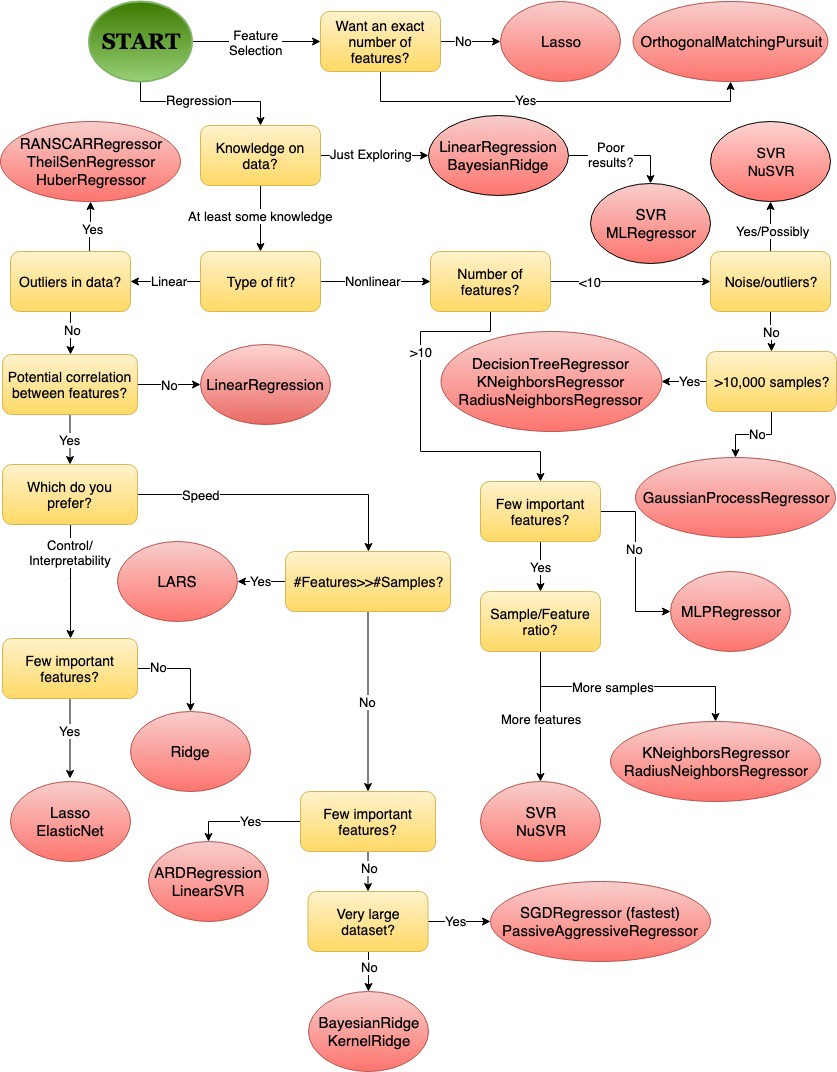

I will use the above guideline to choose a regressor model for the project. I will also test other models and see how well they perform with the default parameters and based on those results, choose one of the models with the best results. If there are similiar results among the best models then more analyzation is needed with them.

I will use the same train data size and the same random state for all of the models. The X in the data is features which contain the developer's skills and experience, and the y is the salary coefficient (developer salary divided by country's average salary). 

To measure accuracy, I defined that a successful prediction is if the predicted salary's and actual salary's difference is at maximum 1.0


In [ ]:
from sklearn.model_selection import train_test_split
import random
import numpy as np
from sklearn import metrics, svm
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import utils

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge, Lasso, LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.kernel_ridge import KernelRidge


# Trying different models

def model_function(model):
    X_train, X_test, y_train, y_test = train_test_split(features, salaries["Coefficient"], random_state=4, train_size=0.5)
    
    model.fit(X_train,y_train)

    pred = model.predict(X_test)

    ok = []

    for i in range(len(pred)):
        #print("Actual=%s, Predicted=%s" % (round(int(y_test.values[i]),2), round(pred[i],2)))
        #print(int(abs(y_test.values[i] - pred[i])))
        if abs(int(y_test.values[i]) - pred[i]) < 1:
            ok.append(0)


    print(round((len(ok)/len(pred) * 100),2))
    
    
model1 = Ridge(alpha=1.0)
model2 = Lasso()
model3 = LinearRegression()
model4 = LogisticRegression()
model5 = DecisionTreeRegressor()
model6 = MLPRegressor()
model7 = BayesianRidge()
model8 = SVR()
model9 = GaussianProcessRegressor()
model10 = KNeighborsRegressor()
model11 = KernelRidge()

models = []
models.extend([model1, model2, model3, model5, model6, model7, model8, model9, model10, model11])
model_names = []
model_names.extend(["Ridge", "Lasso", "LinearRegression", "DecisionTreeRegressor", "MLPRegressor", "BayesianRidge", "SVR",
                    "GaussianProcessRegressor", "KNeighborsRegressor", "KernelRidge"])


# Printing out the results
for i in range(len(models)):
    print(model_names[i])
    model_function(models[i])
    print("")

#### Choosing the model with the best results



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR


def SVR_training(train_size, kernel, gamma, C, epsilon, shrinking):
    
    X_train, X_test, y_train, y_test = train_test_split(features, salaries["Coefficient"], random_state=4, train_size=train_size)
    model = SVR(kernel=kernel, gamma=gamma, C=C, epsilon=epsilon, shrinking=shrinking)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    ok = []

    for i in range(len(pred)):
        #print("Actual=%s, Predicted=%s" % (round(int(y_test.values[i]),2), round(pred[i],2)))
        #print(int(abs(y_test.values[i] - pred[i])))
        if abs(int(y_test.values[i]) - pred[i]) < 1:
            ok.append(0)
            
    result = round((len(ok)/len(pred) * 100),2)
    
    print(str(train_size) + " " + kernel + " " + " " + gamma + " " + str(C) + " " + str(C) + " " + str(epsilon) + " " + str(shrinking)
          + "    RESULT: " + str(round((len(ok)/len(pred) * 100),2)))
    print(min(pred))
    print(max(pred))
    return result

#SVR_training("poly")

train_sizes = [0.3, 0.35, 0.4]
gammas = ["auto", "scale"]
Cs = [0.2,0.4,0.6,0.8,1.0]
epsilons = [0.2,0.4,0.6,0.8,1.0]
shrinkings = [True, False] # default True


# Let's find the best parameters for SVR

best_result = []
best = 0

for i in range(len(train_sizes)):
    train_size = train_sizes[i]
    
    for j in range(len(gammas)):
        gamma = gammas[j]
        
        for m in range(len(Cs)):
            C = Cs[m]
        
            for k in range(len(Cs)):
                epsilon = epsilons[k]

                for l in range(len(shrinkings)):
                    shrinking = shrinkings[l]
                    result = SVR_training(train_size, "linear", gamma, C, epsilon, shrinking)
                    
                    if (result > best):
                        best_result.extend([train_size, "rbf", gamma, C, epsilon, shrinking, result])
                        best = result
            
            
    


print(best_result)



# ! POLY võtab räigelt aega !




<br>
<br>

## Step 5 - Training the model

<br>
<br>

## Step 6 - Analyzing the results

<br>
<br>

## Step 7 - If necessary, repeating steps 2-6 to achieve better results

<br>
<br>

## Step 8 - Testing the model

<br>
<br>

## Visual

In [ ]:
ind = np.arange(100)

plt.bar(ind, salaries.CoefficientSalary.head(100), 0.35)
plt.show()

# Scatter plot of Coefficient of salary/average_salary and YearsCodePro
plt.scatter(features["YearsCodePro"], salaries.Coefficient)
plt.show()

# Scatter plot of X and Y

features.columns

scatter_plot(features["YearsCodePro"], salaries.Coefficient)
scatter_plot(, salaries.Coefficient)
scatter_plot(features["YearsCodePro"], salaries.Coefficient)
scatter_plot(features["YearsCodePro"], salaries.Coefficient)
scatter_plot(features["YearsCodePro"], salaries.Coefficient)
scatter_plot(features["YearsCodePro"], salaries.Coefficient)


def scatter_plot(X, Y):
    plt.scatter(X, Y)
    plt.show()

<br>
<br>

## Bonus fun facts

1) Mean of salary <br>
2) Average salary <br>
3) Most known language among devs <br>
4) Most known database among devs <br>
5) Most known webframe among devs <br>
6)  <br>

In [ ]:
# languages variable contains unique programming language options in the survey (intiliazed )
for i in range(len(languages)):
    amount = features[features[language] == 1]
    print(language + ": " + str(amount))
    